In [39]:
import pandas as pd
import numpy as np
from transformers import AutoConfig, AutoTokenizer
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json
from sentence_transformers import SentenceTransformer

In [21]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [22]:
tokenizer = model.tokenizer

In [23]:
f = open(r'D:\Raghu Studies\LLAMA_FinancialAdvisor\dataset_response.json')
data = json.load(f)

In [24]:
sentences = []
for d in data:
    mysentence = d['about_me'] + ' ' + d['context'] + ' ' + d['response']
    sentences.append(mysentence)

In [36]:
tokenized_sentences = []
for sentence in sentences:
    tokens = tokenizer.tokenize(sentence)
    tokenized_sentences.append(tokens)

# Token length

In [46]:
# minimum 80 to 160 token length

(array([ 7.,  5., 10.,  5.,  3.,  8.,  8., 16., 12., 10.]),
 array([ 75. ,  83.6,  92.2, 100.8, 109.4, 118. , 126.6, 135.2, 143.8,
        152.4, 161. ]),
 <BarContainer object of 10 artists>)

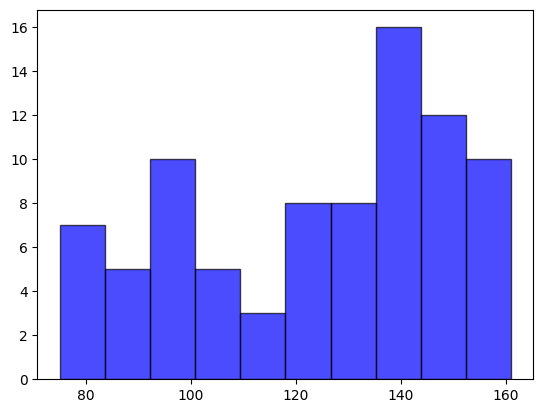

In [45]:
token_length = [len(tok) for tok in tokenized_sentences]
plt.hist(token_length,color='blue', edgecolor='black', alpha=0.7)


# Wordcloud

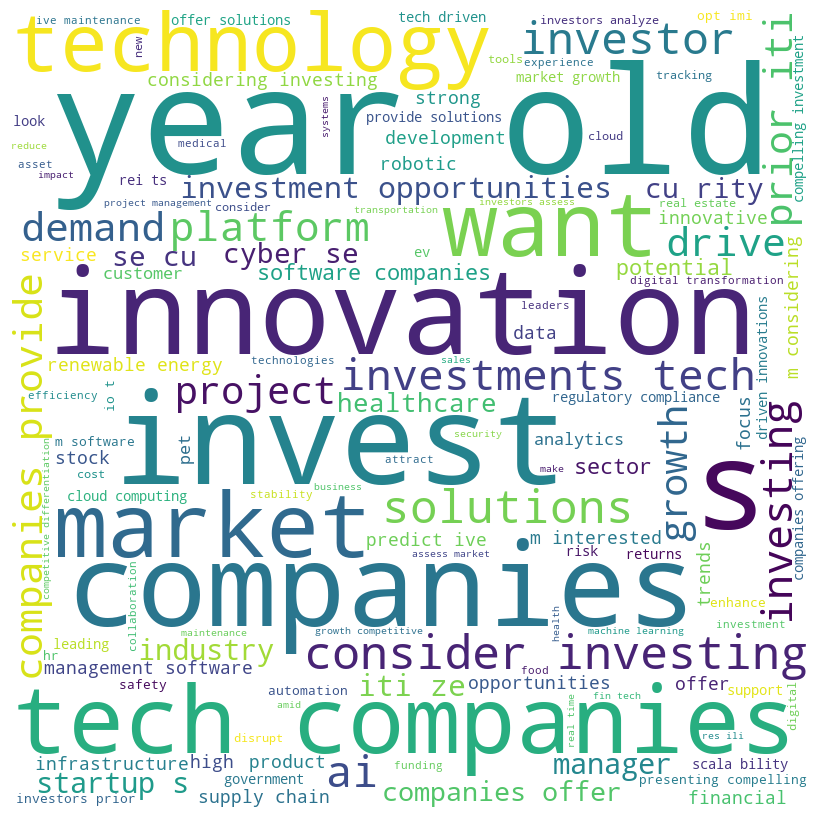

In [40]:
# Concatenate all tokens into a single list
all_tokens = [token for sublist in tokenized_sentences for token in sublist]

# Convert the list of tokens into a space-separated string
text = ' '.join(all_tokens)

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


Invest, Investing, marketing is there 

# Converting the json file to have question as keyword

In [55]:
questions = [prompt['about_me'].split("\n")[-1] for prompt in data]
for i, dictionary in enumerate(data):
    dictionary['question'] = questions[i]

In [61]:
for i, dictionary in enumerate(data):
    dictionary['about_me'] = ''.join(data[i]['about_me'].split("\n")[:-1])

In [65]:
with open(r'D:\Raghu Studies\LLAMA_FinancialAdvisor\dataset_final.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)